# Packages

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# DATASET

## LOAD TRAIN

In [10]:
train =  pd.read_csv('MLUnige2023_subscriptions_train.csv', index_col='Id', na_values='na', header=0)

train = train.astype({'job':'category', 'marital':'category', 'education':'category', 'device':'category', 'outcome_old':'category', 'X1':'bool', 'X2':'bool', 'X3':'bool', 'X4':'float64', 'subscription':'category', 'day':'category', 'month':'category'})

train.day = pd.Categorical(train.day, ordered=True)

train.month = pd.Categorical(train.month, ordered=True)

train


,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,196,failure,False,False,True,0.072803,1
1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,79,success,False,False,False,0.075454,1
2,27,teacher,married,university,smartphone,14,7,8.10,3,0,-1,NaN,False,True,True,0.068110,0
3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,369,other,False,False,True,0.091942,0
4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,143,success,False,False,False,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,16,7,7.30,1,0,-1,NaN,True,False,False,0.072803,0
8948,43,industrial_worker,married,university,smartphone,4,2,37.75,2,0,-1,NaN,False,False,True,0.081456,1
8949,27,manager,single,grad_school,NaN,5,6,29.00,3,0,-1,NaN,False,False,True,0.079186,1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8952 entries, 0 to 8951
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               8952 non-null   int64   
 1   job               8891 non-null   category
 2   marital           8952 non-null   category
 3   education         8574 non-null   category
 4   device            6902 non-null   category
 5   day               8952 non-null   category
 6   month             8952 non-null   category
 7   time_spent        8952 non-null   float64 
 8   banner_views      8952 non-null   int64   
 9   banner_views_old  8952 non-null   int64   
 10  days_elapsed_old  8952 non-null   int64   
 11  outcome_old       2148 non-null   category
 12  X1                8952 non-null   bool    
 13  X2                8952 non-null   bool    
 14  X3                8952 non-null   bool    
 15  X4                8952 non-null   float64 
 16  subscription      8952 n

## MISSING TRAIN

In [12]:
missing_values = train.isnull().mean()

print(missing_values)

age                 0.000000
job                 0.006814
marital             0.000000
education           0.042225
device              0.228999
day                 0.000000
month               0.000000
time_spent          0.000000
banner_views        0.000000
banner_views_old    0.000000
days_elapsed_old    0.000000
outcome_old         0.760054
X1                  0.000000
X2                  0.000000
X3                  0.000000
X4                  0.000000
subscription        0.000000
dtype: float64


## LOAD TEST

In [13]:
test = pd.read_csv('MLUnige2023_subscriptions_test.csv', index_col='Id', na_values='na', header=0)

test = test.astype({'job':'category', 'marital':'category', 'education':'category', 'device':'category', 'outcome_old':'category', 'X1':'bool', 'X2':'bool', 'X3':'bool', 'X4':'float64', 'day':'category', 'month':'category'})

test.day = pd.Categorical(test.day, ordered=True)

test.month = pd.Categorical(test.month, ordered=True)

test

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4
Id,,,,,,,,,,,,,,,,
0,53,retired,married,university,NaN,17,6,5.25,1,0,-1,NaN,False,False,True,0.084570
1,61,manager,married,grad_school,smartphone,20,4,9.00,1,0,-1,NaN,False,False,False,0.075227
2,51,industrial_worker,married,university,NaN,4,7,9.65,1,0,-1,NaN,False,False,False,0.075781
3,34,manager,married,grad_school,NaN,28,5,13.45,2,0,-1,NaN,False,False,True,0.070043
4,30,manager,married,grad_school,smartphone,4,5,16.15,2,0,-1,NaN,False,False,False,0.171618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,47,industrial_worker,married,NaN,NaN,5,6,19.20,2,0,-1,NaN,False,False,True,0.104216
3833,30,teacher,single,university,smartphone,3,3,3.65,1,0,-1,NaN,True,False,False,0.077552
3834,55,teacher,married,university,NaN,26,6,5.15,5,0,-1,NaN,False,False,True,0.129156


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3837 entries, 0 to 3836
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               3837 non-null   int64   
 1   job               3816 non-null   category
 2   marital           3837 non-null   category
 3   education         3677 non-null   category
 4   device            2936 non-null   category
 5   day               3837 non-null   category
 6   month             3837 non-null   category
 7   time_spent        3837 non-null   float64 
 8   banner_views      3837 non-null   int64   
 9   banner_views_old  3837 non-null   int64   
 10  days_elapsed_old  3837 non-null   int64   
 11  outcome_old       900 non-null    category
 12  X1                3837 non-null   bool    
 13  X2                3837 non-null   bool    
 14  X3                3837 non-null   bool    
 15  X4                3837 non-null   float64 
dtypes: bool(3), category(7),

## MISSING TEST

In [15]:
missing_values = test.isnull().mean()

print(missing_values)

age                 0.000000
job                 0.005473
marital             0.000000
education           0.041699
device              0.234819
day                 0.000000
month               0.000000
time_spent          0.000000
banner_views        0.000000
banner_views_old    0.000000
days_elapsed_old    0.000000
outcome_old         0.765442
X1                  0.000000
X2                  0.000000
X3                  0.000000
X4                  0.000000
dtype: float64


## NA VALUES TRAIN

In [16]:
#train['days_elapsed_old'] = train['days_elapsed_old'].replace(-1, np.nan)
#train

In [17]:
train['X1'] = train['X1'].astype(int)
train['X2'] = train['X2'].astype(int)
train['X3'] = train['X3'].astype(int)

train = train.astype({'job':'category', 'marital':'category', 'education':'category', 'device':'category', 'X1':'category', 'X2':'category', 'X3':'category', 'X4':'float64', 'subscription':'category', 'day':'category', 'month':'category'})

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8952 entries, 0 to 8951
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               8952 non-null   int64   
 1   job               8891 non-null   category
 2   marital           8952 non-null   category
 3   education         8574 non-null   category
 4   device            6902 non-null   category
 5   day               8952 non-null   category
 6   month             8952 non-null   category
 7   time_spent        8952 non-null   float64 
 8   banner_views      8952 non-null   int64   
 9   banner_views_old  8952 non-null   int64   
 10  days_elapsed_old  8952 non-null   int64   
 11  outcome_old       2148 non-null   category
 12  X1                8952 non-null   category
 13  X2                8952 non-null   category
 14  X3                8952 non-null   category
 15  X4                8952 non-null   float64 
 16  subscription      8952 n

In [18]:
train

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,196,failure,0,0,1,0.072803,1
1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,79,success,0,0,0,0.075454,1
2,27,teacher,married,university,smartphone,14,7,8.10,3,0,-1,NaN,0,1,1,0.068110,0
3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,369,other,0,0,1,0.091942,0
4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,143,success,0,0,0,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,16,7,7.30,1,0,-1,NaN,1,0,0,0.072803,0
8948,43,industrial_worker,married,university,smartphone,4,2,37.75,2,0,-1,NaN,0,0,1,0.081456,1
8949,27,manager,single,grad_school,NaN,5,6,29.00,3,0,-1,NaN,0,0,1,0.079186,1


## MISSING TRAIN

In [19]:
missing_values = train.isnull().mean()
print(missing_values)

age                 0.000000
job                 0.006814
marital             0.000000
education           0.042225
device              0.228999
day                 0.000000
month               0.000000
time_spent          0.000000
banner_views        0.000000
banner_views_old    0.000000
days_elapsed_old    0.000000
outcome_old         0.760054
X1                  0.000000
X2                  0.000000
X3                  0.000000
X4                  0.000000
subscription        0.000000
dtype: float64


## NA VALUES TEST

In [20]:
#test['days_elapsed_old'] = test['days_elapsed_old'].replace(-1, np.nan)

In [21]:
test['X1'] = test['X1'].astype(int)
test['X2'] = test['X2'].astype(int)
test['X3'] = test['X3'].astype(int)

test = test.astype({'job':'category', 'marital':'category', 'education':'category', 'device':'category', 'X1':'category', 'X2':'category', 'X3':'category', 'X4':'float64', 'day':'category', 'month':'category'})

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3837 entries, 0 to 3836
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               3837 non-null   int64   
 1   job               3816 non-null   category
 2   marital           3837 non-null   category
 3   education         3677 non-null   category
 4   device            2936 non-null   category
 5   day               3837 non-null   category
 6   month             3837 non-null   category
 7   time_spent        3837 non-null   float64 
 8   banner_views      3837 non-null   int64   
 9   banner_views_old  3837 non-null   int64   
 10  days_elapsed_old  3837 non-null   int64   
 11  outcome_old       900 non-null    category
 12  X1                3837 non-null   category
 13  X2                3837 non-null   category
 14  X3                3837 non-null   category
 15  X4                3837 non-null   float64 
dtypes: category(10), float64

In [22]:
test

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4
Id,,,,,,,,,,,,,,,,
0,53,retired,married,university,NaN,17,6,5.25,1,0,-1,NaN,0,0,1,0.084570
1,61,manager,married,grad_school,smartphone,20,4,9.00,1,0,-1,NaN,0,0,0,0.075227
2,51,industrial_worker,married,university,NaN,4,7,9.65,1,0,-1,NaN,0,0,0,0.075781
3,34,manager,married,grad_school,NaN,28,5,13.45,2,0,-1,NaN,0,0,1,0.070043
4,30,manager,married,grad_school,smartphone,4,5,16.15,2,0,-1,NaN,0,0,0,0.171618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,47,industrial_worker,married,NaN,NaN,5,6,19.20,2,0,-1,NaN,0,0,1,0.104216
3833,30,teacher,single,university,smartphone,3,3,3.65,1,0,-1,NaN,1,0,0,0.077552
3834,55,teacher,married,university,NaN,26,6,5.15,5,0,-1,NaN,0,0,1,0.129156


## MISSING TEST

In [23]:
missing_values = test.isnull().mean()
print(missing_values)

age                 0.000000
job                 0.005473
marital             0.000000
education           0.041699
device              0.234819
day                 0.000000
month               0.000000
time_spent          0.000000
banner_views        0.000000
banner_views_old    0.000000
days_elapsed_old    0.000000
outcome_old         0.765442
X1                  0.000000
X2                  0.000000
X3                  0.000000
X4                  0.000000
dtype: float64


## CATEGORICAL VS NUMERICAL COLUMNS

In [24]:
categorical_columns = train.select_dtypes(include=["category","bool", "object"])
categorical_columns_names = list(categorical_columns.columns)
numerical_columns = train.select_dtypes(exclude=["category","bool", "object"])
numerical_columns_names = list(numerical_columns)

print("Numerical:",numerical_columns_names, "\nCategory:",categorical_columns_names)

Numerical: ['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4'] 
Category: ['job', 'marital', 'education', 'device', 'day', 'month', 'outcome_old', 'X1', 'X2', 'X3', 'subscription']


# SCALING

In [25]:
train_num = train[numerical_columns_names]
train_cat = train[categorical_columns_names]

test_num = test[numerical_columns_names]
test_cat = test[categorical_columns_names[:-1]]

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the scaler on the numerical variables
scaler.fit(train_num)
train_num = pd.DataFrame(scaler.transform(train_num), columns=train_num.columns, index=train_num.index)
test_num = pd.DataFrame(scaler.transform(test_num),columns=test_num.columns, index=test_num.index)

# merge again 
train = pd.merge(train_num, train_cat, how="left", on=["Id"])
test = pd.merge(test_num, test_cat, how="left", on=["Id"])

In [26]:
train

,age,time_spent,banner_views,banner_views_old,days_elapsed_old,X4,job,marital,education,device,day,month,outcome_old,X1,X2,X3,subscription
Id,,,,,,,,,,,,,,,,,
0,-1.134397,0.572110,0.162700,1.543875,1.365471,-0.456189,freelance,married,grad_school,smartphone,4,2,failure,0,0,1,1
1,0.584160,-0.241413,-0.545538,0.114732,0.275678,-0.368554,industrial_worker,married,university,smartphone,30,4,success,0,0,0,1
2,-1.220325,-0.534281,0.162700,-0.361649,-0.469480,-0.611350,teacher,married,university,smartphone,14,7,NaN,0,1,1,0
3,0.240448,-0.593446,-0.191419,0.114732,2.976874,0.176463,unemployed,divorced,university,smartphone,13,5,other,0,0,1,0
4,-1.048469,-0.072791,-0.191419,0.591113,0.871804,-0.022516,manager,single,grad_school,smartphone,26,4,success,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,1.099727,-0.581613,-0.545538,-0.361649,-0.469480,-0.456189,industrial_worker,married,university,smartphone,16,7,NaN,1,0,0,0
8948,0.154520,1.219971,-0.191419,-0.361649,-0.469480,-0.170175,industrial_worker,married,university,smartphone,4,2,NaN,0,0,1,1
8949,-1.220325,0.702274,0.162700,-0.361649,-0.469480,-0.245205,manager,single,grad_school,NaN,5,6,NaN,0,0,1,1


In [27]:
test

,age,time_spent,banner_views,banner_views_old,days_elapsed_old,X4,job,marital,education,device,day,month,outcome_old,X1,X2,X3
Id,,,,,,,,,,,,,,,,
0,1.013799,-0.702902,-0.545538,-0.361649,-0.469480,-0.067234,retired,married,university,NaN,17,6,NaN,0,0,1
1,1.701222,-0.481032,-0.545538,-0.361649,-0.469480,-0.376057,manager,married,grad_school,smartphone,20,4,NaN,0,0,0
2,0.841943,-0.442575,-0.545538,-0.361649,-0.469480,-0.357749,industrial_worker,married,university,NaN,4,7,NaN,0,0,0
3,-0.618830,-0.217746,-0.191419,-0.361649,-0.469480,-0.547425,manager,married,grad_school,NaN,28,5,NaN,0,0,1
4,-0.962542,-0.058000,-0.191419,-0.361649,-0.469480,2.810310,manager,married,grad_school,smartphone,4,5,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,0.498232,0.122454,-0.191419,-0.361649,-0.469480,0.582224,industrial_worker,married,NaN,NaN,5,6,NaN,0,0,1
3833,-0.962542,-0.797566,-0.545538,-0.361649,-0.469480,-0.299226,teacher,single,university,smartphone,3,3,NaN,1,0,0
3834,1.185654,-0.708818,0.870939,-0.361649,-0.469480,1.406652,teacher,married,university,NaN,26,6,NaN,0,0,1


## HOT-ENCODING

In [28]:
train_hot = pd.get_dummies(train, columns=['job','marital','education','device','day','month','outcome_old'])
test_hot = pd.get_dummies(test, columns=['job','marital','education','device','day','month','outcome_old'])

### TRAIN

In [29]:
train_hot

,age,time_spent,banner_views,banner_views_old,days_elapsed_old,X4,X1,X2,X3,subscription,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,outcome_old_failure,outcome_old_other,outcome_old_success
Id,,,,,,,,,,,,,,,,,,,,,
0,-1.134397,0.572110,0.162700,1.543875,1.365471,-0.456189,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,0.584160,-0.241413,-0.545538,0.114732,0.275678,-0.368554,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-1.220325,-0.534281,0.162700,-0.361649,-0.469480,-0.611350,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0.240448,-0.593446,-0.191419,0.114732,2.976874,0.176463,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.048469,-0.072791,-0.191419,0.591113,0.871804,-0.022516,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,1.099727,-0.581613,-0.545538,-0.361649,-0.469480,-0.456189,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8948,0.154520,1.219971,-0.191419,-0.361649,-0.469480,-0.170175,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8949,-1.220325,0.702274,0.162700,-0.361649,-0.469480,-0.245205,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [30]:
train_hot = train_hot.astype({'X1':'uint8', 'X2':'uint8', 'X3':'uint8'})
train_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8952 entries, 0 to 8951
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    8952 non-null   float64 
 1   time_spent             8952 non-null   float64 
 2   banner_views           8952 non-null   float64 
 3   banner_views_old       8952 non-null   float64 
 4   days_elapsed_old       8952 non-null   float64 
 5   X4                     8952 non-null   float64 
 6   X1                     8952 non-null   uint8   
 7   X2                     8952 non-null   uint8   
 8   X3                     8952 non-null   uint8   
 9   subscription           8952 non-null   category
 10  job_entrepreneur       8952 non-null   uint8   
 11  job_freelance          8952 non-null   uint8   
 12  job_housekeeper        8952 non-null   uint8   
 13  job_industrial_worker  8952 non-null   uint8   
 14  job_manager            8952 non-null   u

### TEST

In [31]:
test_hot

,age,time_spent,banner_views,banner_views_old,days_elapsed_old,X4,X1,X2,X3,job_entrepreneur,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,outcome_old_failure,outcome_old_other,outcome_old_success
Id,,,,,,,,,,,,,,,,,,,,,
0,1.013799,-0.702902,-0.545538,-0.361649,-0.469480,-0.067234,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1.701222,-0.481032,-0.545538,-0.361649,-0.469480,-0.376057,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.841943,-0.442575,-0.545538,-0.361649,-0.469480,-0.357749,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.618830,-0.217746,-0.191419,-0.361649,-0.469480,-0.547425,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.962542,-0.058000,-0.191419,-0.361649,-0.469480,2.810310,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,0.498232,0.122454,-0.191419,-0.361649,-0.469480,0.582224,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3833,-0.962542,-0.797566,-0.545538,-0.361649,-0.469480,-0.299226,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3834,1.185654,-0.708818,0.870939,-0.361649,-0.469480,1.406652,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [32]:
test_hot = test_hot.astype({'X1':'uint8', 'X2':'uint8', 'X3':'uint8'})
test_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3837 entries, 0 to 3836
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3837 non-null   float64
 1   time_spent             3837 non-null   float64
 2   banner_views           3837 non-null   float64
 3   banner_views_old       3837 non-null   float64
 4   days_elapsed_old       3837 non-null   float64
 5   X4                     3837 non-null   float64
 6   X1                     3837 non-null   uint8  
 7   X2                     3837 non-null   uint8  
 8   X3                     3837 non-null   uint8  
 9   job_entrepreneur       3837 non-null   uint8  
 10  job_freelance          3837 non-null   uint8  
 11  job_housekeeper        3837 non-null   uint8  
 12  job_industrial_worker  3837 non-null   uint8  
 13  job_manager            3837 non-null   uint8  
 14  job_retired            3837 non-null   uint8  
 15  job_

## DROPPING SUBSCRIPTION FOR PREDICTIONS

In [33]:
train_no_subscription = train_hot.drop('subscription', axis=1)
train_only_subscription = train_hot['subscription']

# TRAIN, TEST AND VALIDATION

In [34]:
valid_size = 0.17

# Split the data into training and test sets
X_train, X_valid, Y_train, Y_valid = train_test_split(train_no_subscription, train_only_subscription, test_size=valid_size,  stratify=train_only_subscription)

In [35]:
Cond1 = X_train.shape[0] == Y_train.shape[0]

Cond2 = X_valid.shape[0] == Y_valid.shape[0]

print("\nSame Size ?","\n\nFor Training:",Cond1,", For Validation:", Cond2)

PropTV = (X_valid.shape[0]/X_train.shape[0])*100
PropTR = (1-(X_valid.shape[0]/X_train.shape[0]))*100

print("\nProportions between Training and Validation:","\n Training: ", round(PropTR,2),"%", "\n Validation: ",round(PropTV,2),"%")


Same Size ? 

For Training: True , For Validation: True

Proportions between Training and Validation: 
 Training:  79.52 % 
 Validation:  20.48 %


# PREDICTIVE MODELS

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [44]:
def plot_ROC(true, predicted):
    RocCurveDisplay.from_predictions(
        true,
        predicted,
        color="darkorange",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


def make_confusion_matrix(cf,
                          group_names= None,
                          categories= 'auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            specificity = cf[0,0] / (cf[0,0] + cf[0,1])
            sensitivity = cf[1,1] / (cf[1,0] + cf[1,1])
            stats_text = "\n\nAccuracy={:0.3f}   Precision={:0.3f}   Recall={:0.3f}\n      F1 Score={:0.3f}   Sensitivity{:0.3f}   Specificity={:0.3f}".format(
                accuracy,precision,recall,f1_score, sensitivity,specificity)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    
    plt.show()


model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_dim=74, activation='relu'))
model.add(keras.layers.Dropout(name="drop2", rate=0.2))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(name="drop3", rate=0.2))
model.add(keras.layers.Dense(2, activation='softmax'))

model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.0001) # SGD, Nadam, 

model.compile(loss = "sparse_categorical_crossentropy", # as y is encoded as a vector of labels and not as a one hot matrix
              optimizer = optimizer,
              metrics = ["accuracy"])

history = model.fit(X_train, Y_train,
                    validation_data=(X_valid, Y_valid), 
                    batch_size = 64,
                    epochs=100)
model.save("checkpoints/dense_nn3.h5")

def plot_training(history_dict):
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b--', label='Training')
    plt.plot(epochs, val_loss, 'r-', label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'b--', label='Training')
    plt.plot(epochs, val_acc, 'r-', label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    plt.show()

## RANDOM FORESTS

### NO TUNING

In [42]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
  
# predict the mode
y_pred = model.predict(X_valid)
  
# performance evaluatio metrics
print(classification_report(y_pred, Y_valid))

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### TUNING

In [209]:

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [210]:
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid)
random_search.fit(X_train, Y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=150)


In [211]:
model_random = RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=150)
model_random.fit(X_train, Y_train)
y_pred_rand = model_random.predict(X_valid)
print(classification_report(y_pred_rand, Y_valid))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       977
           1       0.84      0.80      0.82      1006

    accuracy                           0.82      1983
   macro avg       0.82      0.82      0.82      1983
weighted avg       0.82      0.82      0.82      1983



## BAGGING

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

In [ ]:
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, Y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = Y_valid, y_pred = clf.predict(X_valid)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

## XGBoost

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [75]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Define alphas as hyperparameter
from scipy.stats import uniform, randint
param_grid = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

# Define folds object
folds = KFold(n_splits=5 , shuffle=True, random_state=1)

# Create the GridSearchCV object
grid_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, random_state=42, n_iter=200, cv=folds, verbose=1, n_jobs=5, return_train_score=True)
grid_search.fit(X_train, Y_train)

# extract results
results = pd.DataFrame(grid_search.cv_results_)
test_MSEs = -results["mean_test_score"]
std_test_MSEs = results["std_test_score"] / np.sqrt(grid_search.n_splits_)
parameters = results[['param_' + i for i in param_grid.keys()]]

# best parameters
index_best = np.argmin(test_MSEs) # index of the k value with the lowest MSE estimate



Fitting 5 folds for each of 200 candidates, totalling 1000 fits


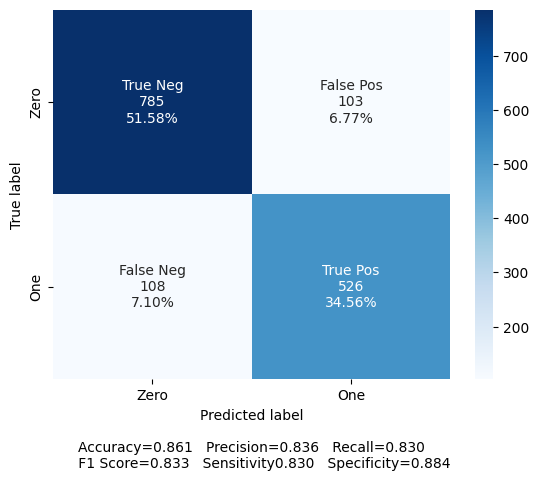

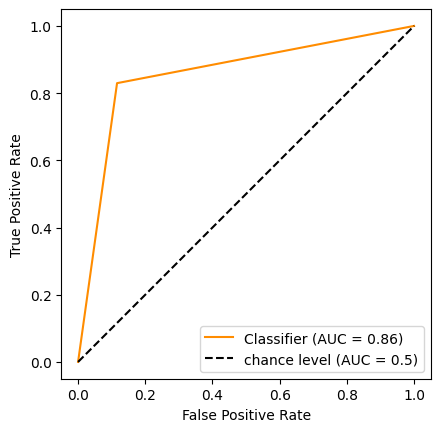

In [76]:
xgb = xgb.XGBClassifier(objective="binary:logistic", 
                               random_state=42, 
                               colsample_bytree = results.param_colsample_bytree[index_best],
                               gamma = results.param_gamma[index_best],
                               learning_rate = results.param_learning_rate[index_best], # default 0.1 
                               max_depth = results.param_max_depth[index_best], # default 3
                               n_estimators = results.param_n_estimators[index_best], # default 100
                               subsample = results.param_subsample[index_best])

xgb.fit(X_train, Y_train)
predictions = xgb.predict(X_valid)
predictions = [1 if i > 0.5 else 0 for i in predictions]
make_confusion_matrix(confusion_matrix(Y_valid, predictions), group_names=['True Neg','False Pos','False Neg','True Pos'],  categories=['Zero', 'One'])
plot_ROC(Y_valid, predictions)

## LightGBM

In [77]:
import lightgbm as lgb
import pprint
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np


In [78]:


# define the parameter grid
param_grid = {
    'learning_rate': np.logspace(-3, 0, num=100),
    'n_estimators': np.arange(100, 1000, 50),
    'num_leaves': np.arange(10, 201, 10),
    'min_child_samples': np.arange(1, 51, 5),
    'subsample': np.linspace(0.5, 1, num=50),
    'colsample_bytree': np.linspace(0.5, 1, num=50)
}

# create a LightGBM classifier object
lgbm = LGBMClassifier(random_state=42)

# create a randomized search object
random_search = RandomizedSearchCV(estimator=lgbm,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=5,
                                   n_jobs=-1,
                                   random_state=42)

# fit the randomized search object to the data
random_search.fit(X_train, Y_train)

# print the best set of parameters and the corresponding score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters:  {'subsample': 0.9897959183673469, 'num_leaves': 120, 'n_estimators': 350, 'min_child_samples': 16, 'learning_rate': 0.01519911082952934, 'colsample_bytree': 0.5816326530612245}
Best score:  0.8585464333781966


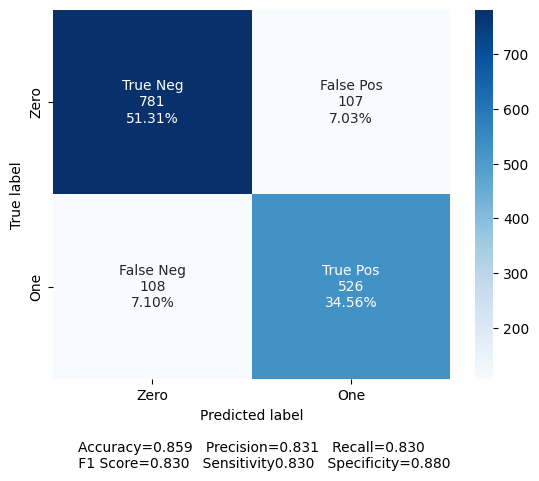

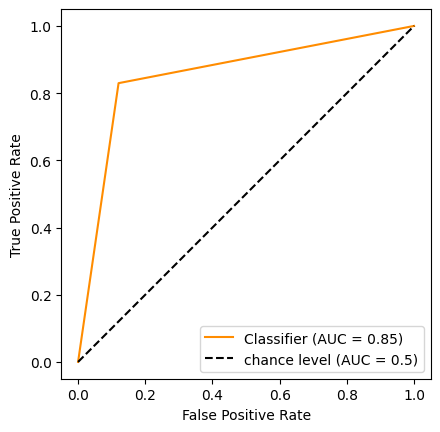

In [79]:

# Set the best hyperparameters found by random search
best_learning_rate = random_search.best_params_['learning_rate']
best_n_estimators = random_search.best_params_['n_estimators']
best_num_leaves = random_search.best_params_['num_leaves']
best_min_child_samples = random_search.best_params_['min_child_samples']
best_subsample = random_search.best_params_['subsample']
best_colsample_bytree = random_search.best_params_['colsample_bytree']

# Create a LightGBM classifier object with the best hyperparameters
lightgbm = LGBMClassifier(learning_rate=best_learning_rate, 
                      n_estimators=best_n_estimators, 
                      num_leaves=best_num_leaves, 
                      min_child_samples=best_min_child_samples, 
                      subsample=best_subsample, 
                      colsample_bytree=best_colsample_bytree,
                      random_state=42)

# Fit the model to the training data
lightgbm.fit(X_train, Y_train)

predictions = lightgbm.predict(X_valid)
make_confusion_matrix(confusion_matrix(Y_valid, predictions), group_names=['True Neg','False Pos','False Neg','True Pos'],  categories=['Zero', 'One'])
plot_ROC(Y_valid, predictions)

## NN

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [55]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, input_dim=74, activation='relu'))
model.add(keras.layers.Activation('sigmoid'))
model.add(keras.layers.Dropout(name="drop1", rate=0.2))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Activation('sigmoid'))
model.add(keras.layers.Dropout(name="drop2", rate=0.2))
model.add(keras.layers.Dense(2, activation='softmax'))

model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = "sparse_categorical_crossentropy", # as y is encoded as a vector of labels and not as a one hot matrix
              optimizer = optimizer,
              metrics = ["accuracy"])

history = model.fit(X_train, Y_train,
                    validation_data=(X_valid, Y_valid), 
                    batch_size = 64,
                    epochs=100)
model.save("checkpoints/dense_nn.h5")

plot_training(history.history)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 50)                3750      
                                                                 
 dense_34 (Dense)            (None, 30)                1530      
                                                                 
 drop2 (Dropout)             (None, 30)                0         
                                                                 
 dense_35 (Dense)            (None, 2)                 62        
                                                                 
Total params: 5,342
Trainable params: 5,342
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
117/117 [==============================] - 3s 12ms/step - loss: 0.5023 - accuracy: 0.7694 - val_loss: 0.4207 - val_accuracy: 0.8193
Epoch 2/100
117/117 [==================

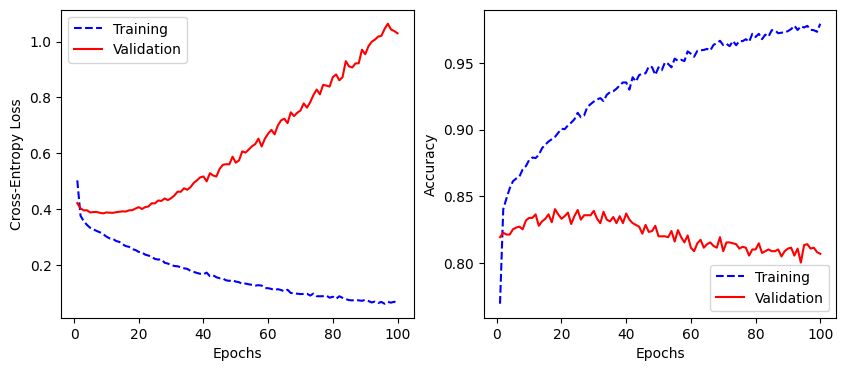

In [63]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, input_dim=74, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dropout(name="drop2", rate=0.2))
model.add(keras.layers.Dense(2, activation='softmax'))

model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = "sparse_categorical_crossentropy", # as y is encoded as a vector of labels and not as a one hot matrix
              optimizer = optimizer,
              metrics = ["accuracy"])

history = model.fit(X_train, Y_train,
                    validation_data=(X_valid, Y_valid), 
                    batch_size = 64,
                    epochs=100)
model.save("checkpoints/dense_nn2.h5")

plot_training(history.history)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 300)               22500     
                                                                 
 drop2 (Dropout)             (None, 300)               0         
                                                                 
 dense_52 (Dense)            (None, 100)               30100     
                                                                 
 drop3 (Dropout)             (None, 100)               0         
                                                                 
 dense_53 (Dense)            (None, 2)                 202       
                                                                 
Total params: 52,802
Trainable params: 52,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
117/117 [============================

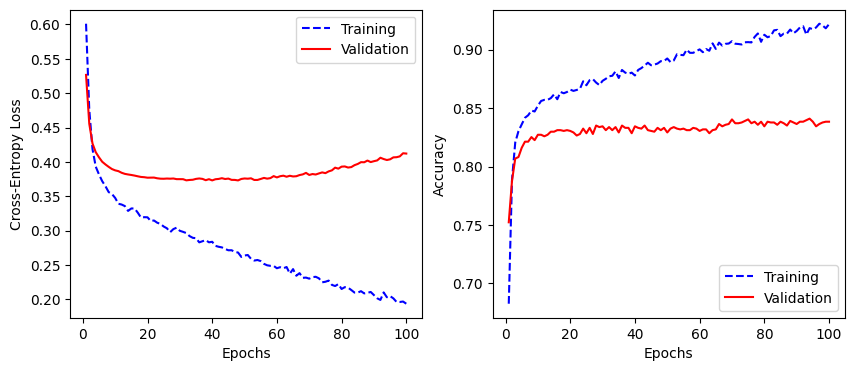

In [69]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_dim=74, activation='relu'))
model.add(keras.layers.Dropout(name="drop2", rate=0.2))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(name="drop3", rate=0.2))
model.add(keras.layers.Dense(2, activation='softmax'))

model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.0001) # SGD, Nadam, 

model.compile(loss = "sparse_categorical_crossentropy", # as y is encoded as a vector of labels and not as a one hot matrix
              optimizer = optimizer,
              metrics = ["accuracy"])

history = model.fit(X_train, Y_train,
                    validation_data=(X_valid, Y_valid), 
                    batch_size = 64,
                    epochs=100)
model.save("checkpoints/dense_nn3.h5")

plot_training(history.history)

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath="checkpoints/model_epoch={epoch:02d}_val_accuracy={val_accuracy:.2f}.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, verbose=1)

history = model.fit(X_train, Y_train,
                    validation_data=(X_valid, Y_valid), 
                    batch_size = 64,
                    epochs=100, callbacks=[early_stopping_cb, checkpoint_cb])

# KAGGLE


In [80]:
test_hot

,age,time_spent,banner_views,banner_views_old,days_elapsed_old,X4,X1,X2,X3,job_entrepreneur,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,outcome_old_failure,outcome_old_other,outcome_old_success
Id,,,,,,,,,,,,,,,,,,,,,
0,1.013799,-0.702902,-0.545538,-0.361649,-0.469480,-0.067234,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1.701222,-0.481032,-0.545538,-0.361649,-0.469480,-0.376057,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.841943,-0.442575,-0.545538,-0.361649,-0.469480,-0.357749,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.618830,-0.217746,-0.191419,-0.361649,-0.469480,-0.547425,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.962542,-0.058000,-0.191419,-0.361649,-0.469480,2.810310,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,0.498232,0.122454,-0.191419,-0.361649,-0.469480,0.582224,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3833,-0.962542,-0.797566,-0.545538,-0.361649,-0.469480,-0.299226,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3834,1.185654,-0.708818,0.870939,-0.361649,-0.469480,1.406652,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


## FIT MODEL WITH 100% DATA

In [82]:
lightgbm.fit(train_no_subscription, train_only_subscription)

LGBMClassifier(colsample_bytree=0.5816326530612245,
               learning_rate=0.01519911082952934, min_child_samples=16,
               n_estimators=350, num_leaves=120, random_state=42,
               subsample=0.9897959183673469)

In [83]:
# Make predictions
y_test_pred = lightgbm.predict(test_hot)

In [84]:
Predictions_On_Test = pd.DataFrame({'subscription': y_test_pred}).reset_index()

Predictions_On_Test = Predictions_On_Test.rename(columns={Predictions_On_Test.columns[0]: 'Id'})

pd.DataFrame(Predictions_On_Test).to_csv("Predictions_On_Test_Kaggle.csv",index=False)

print(y_test_pred.shape)

(3837,)
